# 회귀분석(Regression)
- 과거를 돌아보면서 미래를 예측한다.
- 데이터를 이용하여 함수식 (Y= aX + b)를 구한다.
- a: 기울기(DL : Weigth) 와 절편(DL : Bias)을 DataSet으로 최적값을 구한다.(최적값 :ŷ)<br>
(정답과 오차율의 차이가 제일 적은것으로 선택 --> 인공신경망(DL)으로 발전)
- 기울기와 절편으로 Y값으로 예측할 수 있다.

### 단순회귀 분석 : Y=aX+b

In [3]:
regression <- read.csv("Rdata/regression.csv")
head(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


In [6]:
tail(regression)
#age는 범주형 데이터네
#age컬럼은 별로 의미가 없겠구나!

,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [5]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 16 24 30 4 15 19 21 23 26 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [8]:
# 기본통계량 확인
summary(regression)

## height, weight 둘다 왼쪽으로 쏠려있네!

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12~18Months: 1   Mean   :135.8   Mean   :42.62  
 12Year     : 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

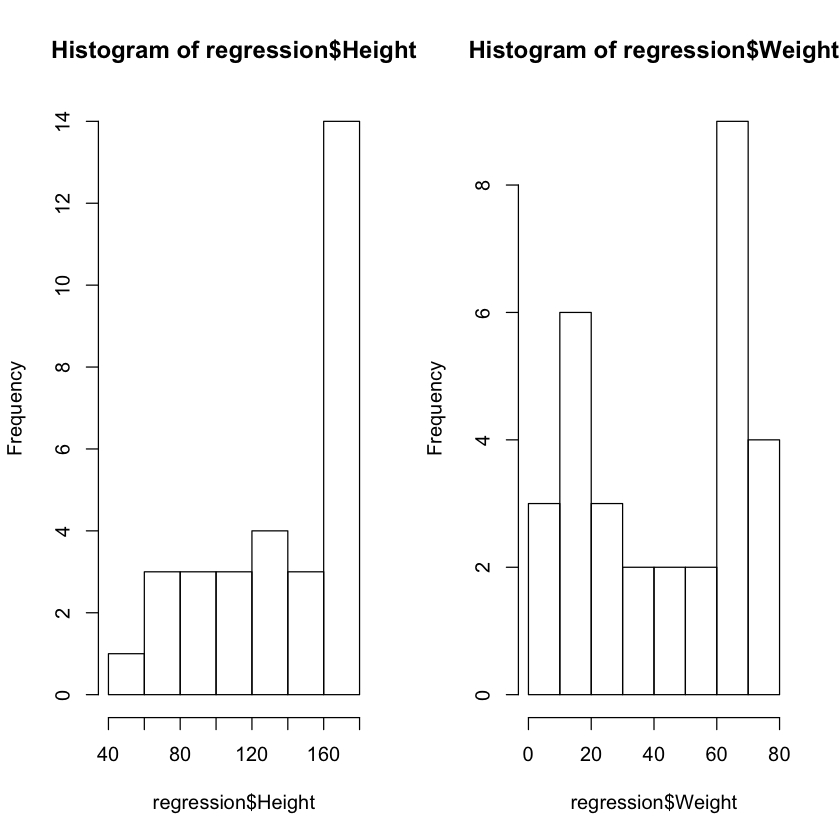

In [25]:
par(mfcol = c(1,2))
hist(regression$Height)
hist(regression$Weight)

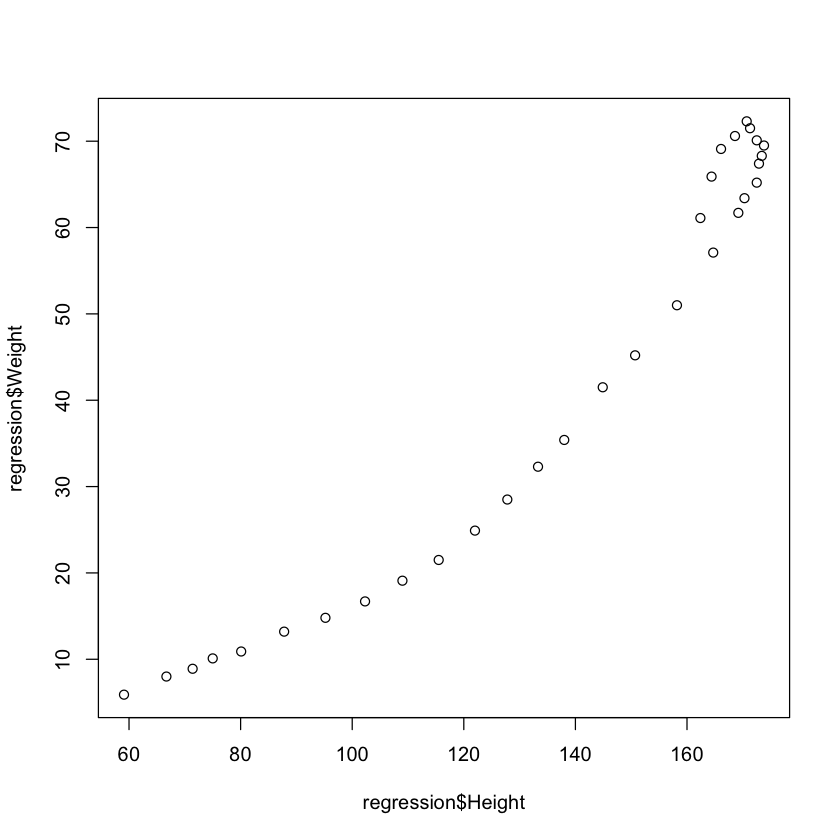

In [24]:
# 산포도 확인
# 이걸 확인해야 데이터를 사용할지 안할지를 알수 있다.
# 좋은 그래프네~
plot(regression$Height,regression$Weight)

In [15]:
# 상관관계 확인
# 키가 커지면 몸무게가 늘어나겠구나!
#당연한것.

cor(regression$Height,regression$Weight)

[1] 0.9672103

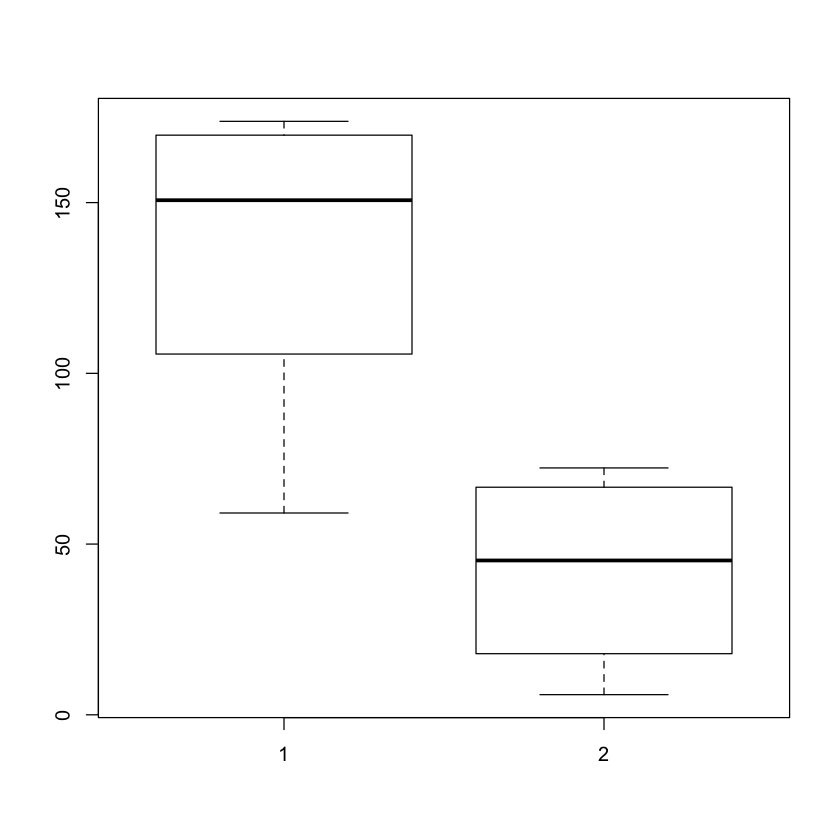

In [20]:
#이상치가 없네!
boxplot(regression$Height, regression$Weight)

#### 회귀선(중심선, 평균선) 그리기
- 회귀선( 중심선, 평균선 )
- 1.수식(공식) 만들기 : 최적의 a,b값을 찾아낸거
- y ~ x의 수식

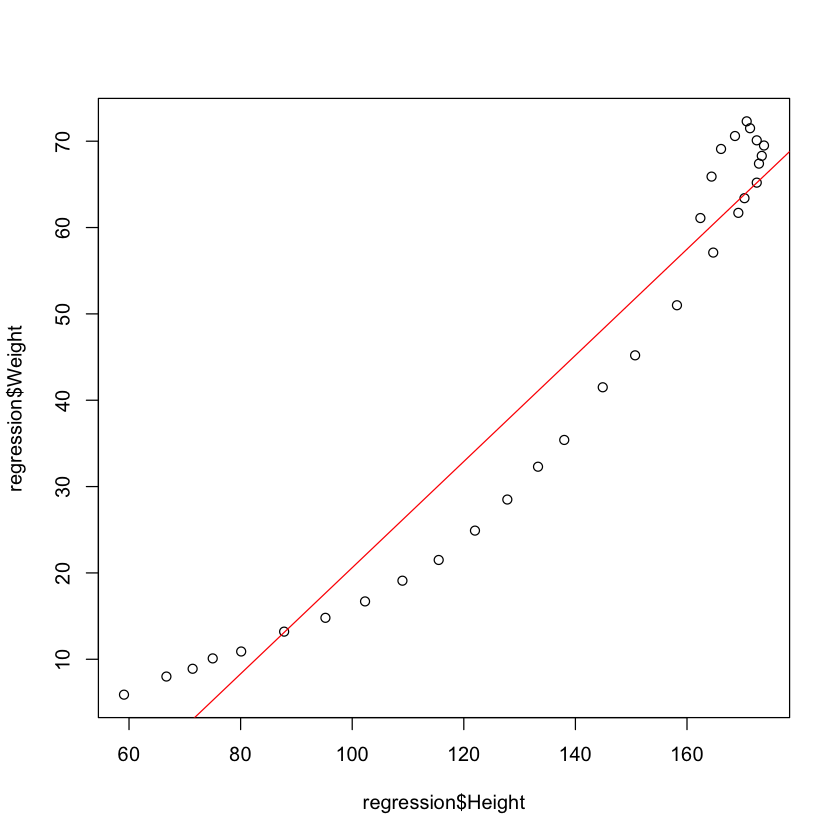

In [30]:
plot(regression$Weight ~ regression$Height)

#회귀선( 중심선, 평균선 )
#1.수식(공식) 만들기 : 최적의 a,b값을 찾아낸거
# y ~ x의 수식
# a.b 값구하기
r <- lm(regression$Weight ~ regression$Height)
# 선그리기
abline(r, col = "red")

#### 분석결과

In [31]:
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


##### p-value: < 2.2e-16 < 0.05 
##### Adjusted R-squared:  0.9333 <- 예측력 (93%의 정확도가 있다.)
##### *** Residual standard error: 6.355 <-- 표준오차
- -표준오차 ~ Y ~ +표준오차 사이에 있는값이  ==> ŷ

##### *****Coefficients : ' *** ' 표시가 진짜 중요하구나
##### 29 degrees of freedom <-- 자유도

In [55]:
# a.b 값구하기
r

# 키가 170인 사람의 몸무게
a <-  0.6147 * 170 + (-40.8659)


# 표준오차(6.355)를 적용한 키가 170인 사람의 몸무게
cat(a - 6.355,"~",a + 6.355)

#표준오차가 적은게 제일 좋다.


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


57.2781 ~ 69.9881

---

In [41]:
IQ <- read.csv("Rdata/IQ.csv")
head(IQ)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


In [42]:
tail(IQ)

,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
5,E,65,105,0,4,4
6,F,80,123,3,1,1
7,G,83,132,3,4,1
8,H,70,115,1,1,3
9,I,87,128,4,0,0
10,J,79,131,2,2,3


### IQ가 126인 사람의 성적을 예측해 보시오

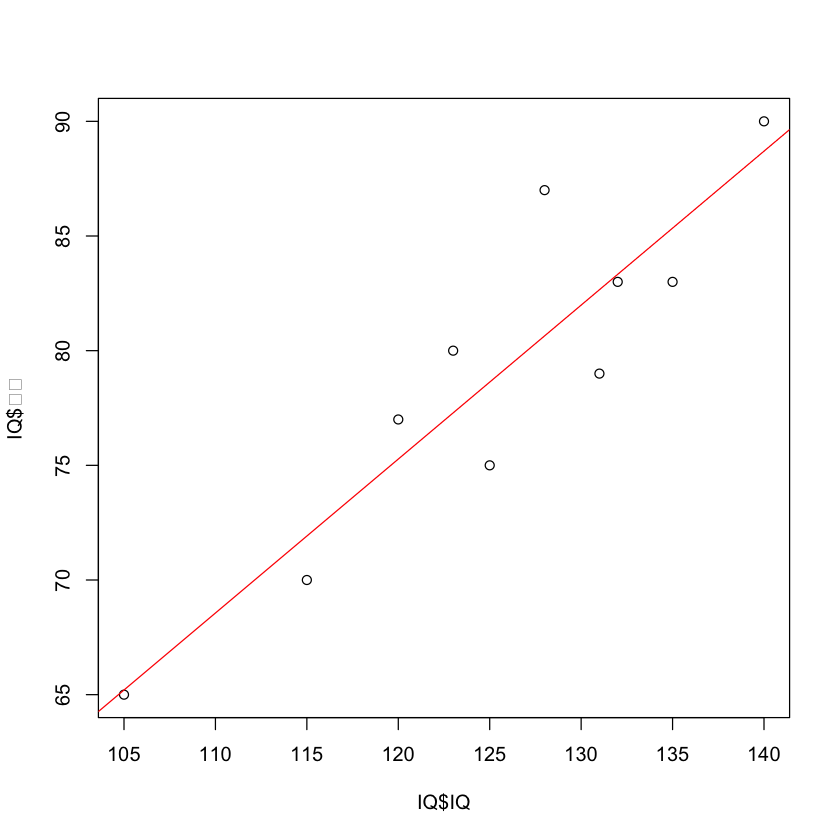

In [107]:
options(warn = -1)
# IQ가 126인 사람의 성적을 예측해 보시오

plot(IQ$성적 ~ IQ$IQ)
a <- lm(IQ$성적 ~ IQ$IQ)
abline(a ,col = "red")

In [59]:
summary(a)


Call:
lm(formula = IQ$성적 ~ IQ$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
IQ$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [60]:
a


Call:
lm(formula = IQ$성적 ~ IQ$IQ)

Coefficients:
(Intercept)        IQ$IQ  
    -5.2918       0.6714  


In [62]:
cor(IQ$성적,IQ$IQ)

[1] 0.9102242

In [69]:
cat(0.6714*126-3.322,"~",0.6714*126+3.322)

81.2744 ~ 87.9184

### 성적과 가장 관련이 깊은 항목은?

In [76]:
# iq가 낮으면 학원을 많이 다녀야한다.
cor(IQ[,-1])

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


In [71]:
head(IQ)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


#### 학원을 몇군데 다녀야 성적이 90점 이상이 될까?
- 타켓은 학생수
- 성적은 피쳐

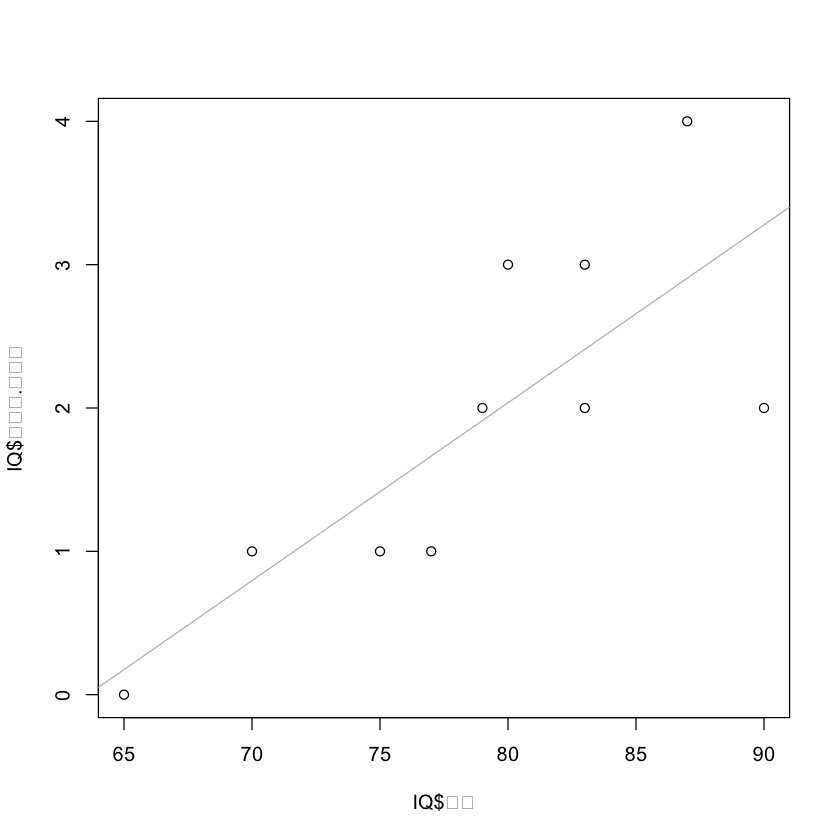

In [85]:
options(warn = -1)

plot(IQ$다니는.학원수~ IQ$성적 )
b<- lm(IQ$다니는.학원수 ~ IQ$성적)

abline(b, col="gray")

In [87]:
summary(b)
b


Call:
lm(formula = IQ$다니는.학원수 ~ IQ$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
IQ$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264



Call:
lm(formula = IQ$다니는.학원수 ~ IQ$성적)

Coefficients:
(Intercept)      IQ$성적  
    -7.8916       0.1241  


In [97]:
bb <- (90*0.03473+0.02090)
bb-0.7882
bb+0.7882

cat(bb-0.7882,"~",bb+0.7882)

[1] 2.3584

[1] 3.9348

2.3584 ~ 3.9348

### 성적이 85점 이라면 IQ는 얼마일까?
- 타겟 선택은 사람이 정해줘야함

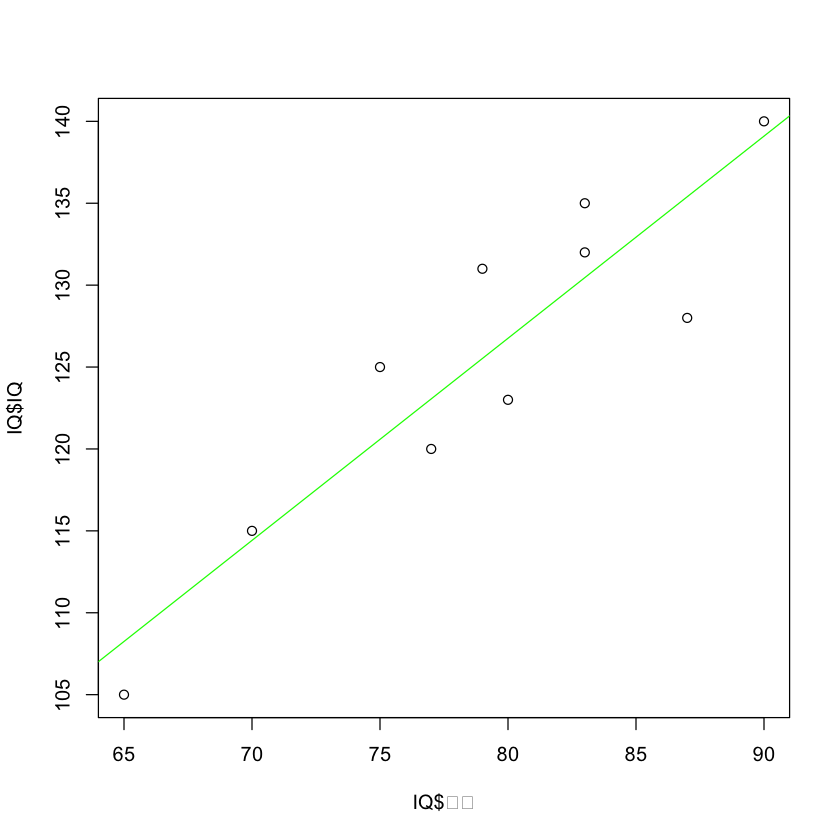

In [99]:
options(warn = -1)

plot(IQ$IQ~ IQ$성적 )
c <- lm(IQ$IQ ~ IQ$성적)

abline(c, col="green")

In [101]:
summary(c)
c


Call:
lm(formula = IQ$IQ ~ IQ$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
IQ$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547



Call:
lm(formula = IQ$IQ ~ IQ$성적)

Coefficients:
(Intercept)      IQ$성적  
     28.035        1.234  


In [106]:
cc <- (85*1.234)
cat(cc-4.504,"~",cc+4.504)

100.386 ~ 109.394

---

## 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 예측하는 방법
- y 하나에 여러 컬럼들이 있다

### attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개부서 (무작위) 약 35명을 대상으로 한 설문지 데이터
- 각부서는 각 부서의 7개 질문에 대한 점수를 나타낸다

In [109]:
#help(attitude)

In [110]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


In [111]:
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


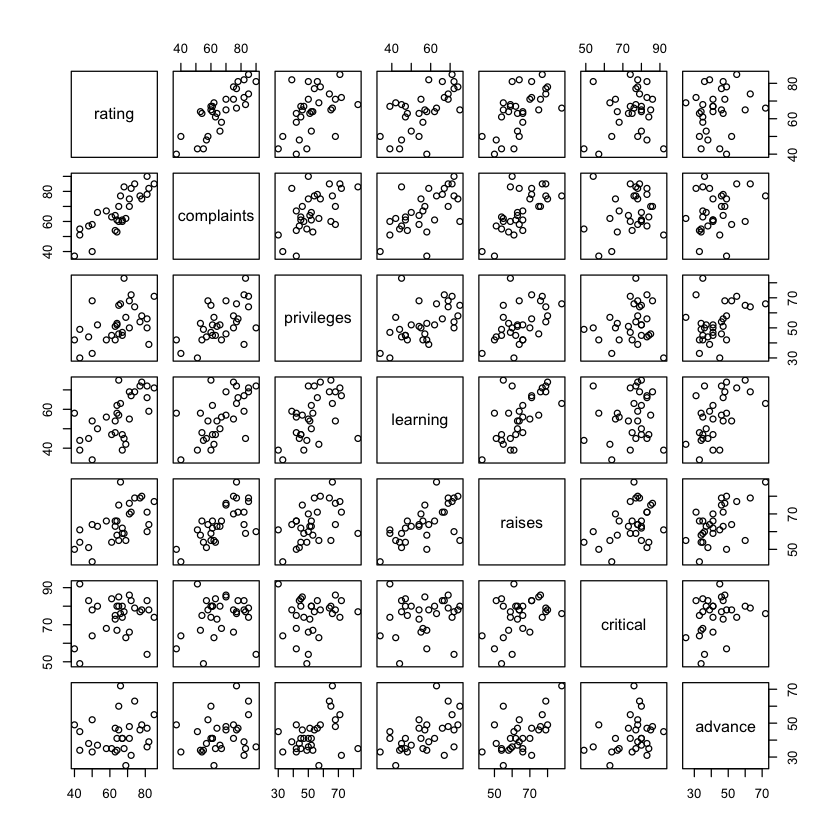

In [113]:
# 다숫자니까 attitude 만 불러와서 확인 가능!
plot(attitude)

#### 회귀분석을 해보자!

In [120]:
#lm(rating ~ complaints + privileges + learning + raises + critical, data = attitude)

# . rating 를 뺴고 전부다
model <- lm(rating ~ . ,data = attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


rating =  0.61319 * complaints + -0.07305 *privileges +...+ 10.78708

#### Model 검토

In [121]:
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [123]:
# 위에서 예측력가 0.6628 나오네 상관관계 확인해보자
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


#### 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
- step() 상관관계가 없는걸 지움
- direction = "backward"
- 회귀분석은 factor를 모름(ML 은 알고있음)

In [124]:
#
reduced <- (step(model,direction = "backward"))

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

complaints + learning 만 남았다

In [125]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


컬럼이 전체 다있었을때는 0.6628 제거하니까 (예측력)Adjusted R-squared: 0.6864 <br>
예측력이 올랐네!

#### iris에 대한 다중 회귀분석

In [131]:
head(iris)
str(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [147]:
# as.numeric(Species) 중요하다! 숫자로 바꿔줘야해
iris.model <- lm(as.numeric(Species)~ . , data = iris)
iris.step <- step(iris.model)
summary(iris.step)

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38



Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16
